In [ ]:
!nvidia-smi

Fri Jan 27 04:59:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    24W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/107.7 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%cd /content/drive/MyDrive/CSE428_Project/yolov8

/content/drive/MyDrive/CSE428_Project/yolov8


In [ ]:
%cd /content/drive/MyDrive/CSE428_Project/yolov8

!yolo task=detect mode=train model=yolov8n.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/CSE428_Project/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False

In [9]:
!ls runs/detect/train12/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1714652213.09411d82030b.6273.0  train_batch1380.jpg    val_batch1_pred.jpg
F1_curve.png					    train_batch1381.jpg    val_batch2_labels.jpg
P_curve.png					    train_batch1382.jpg    val_batch2_pred.jpg
PR_curve.png					    train_batch1.jpg	   weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


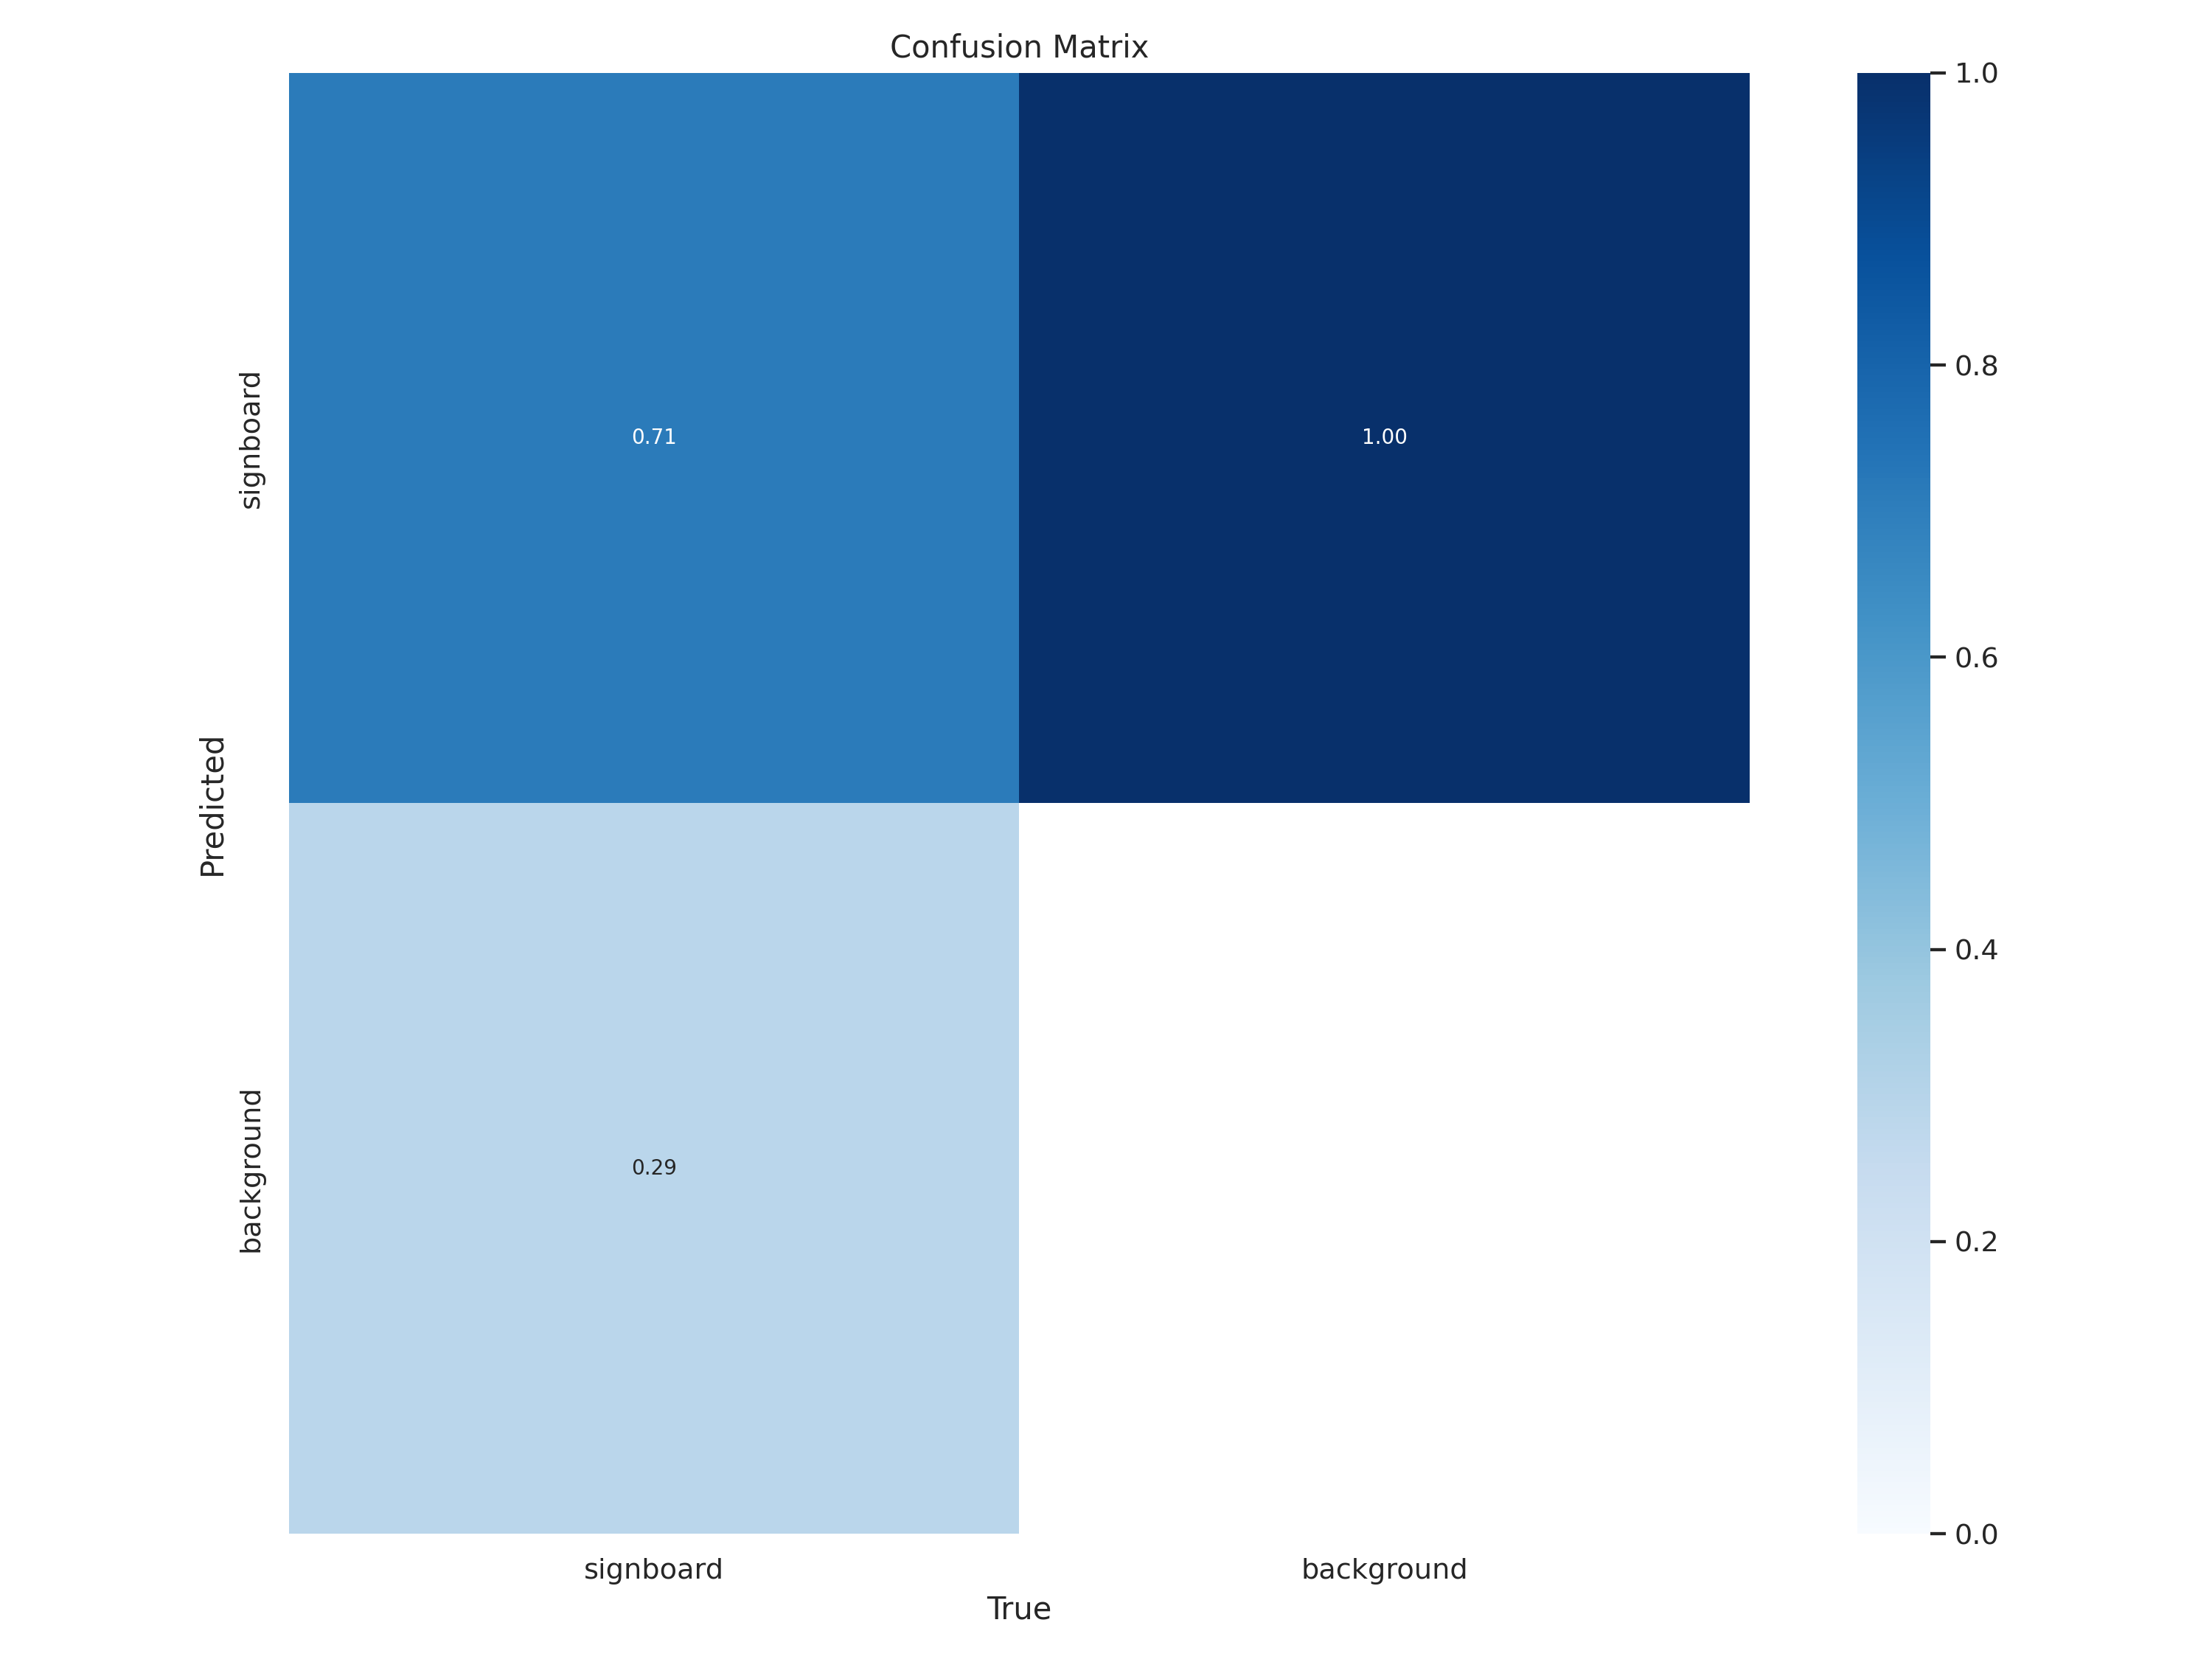

In [10]:
Image(filename='runs/detect/train12/confusion_matrix.png', width=600)

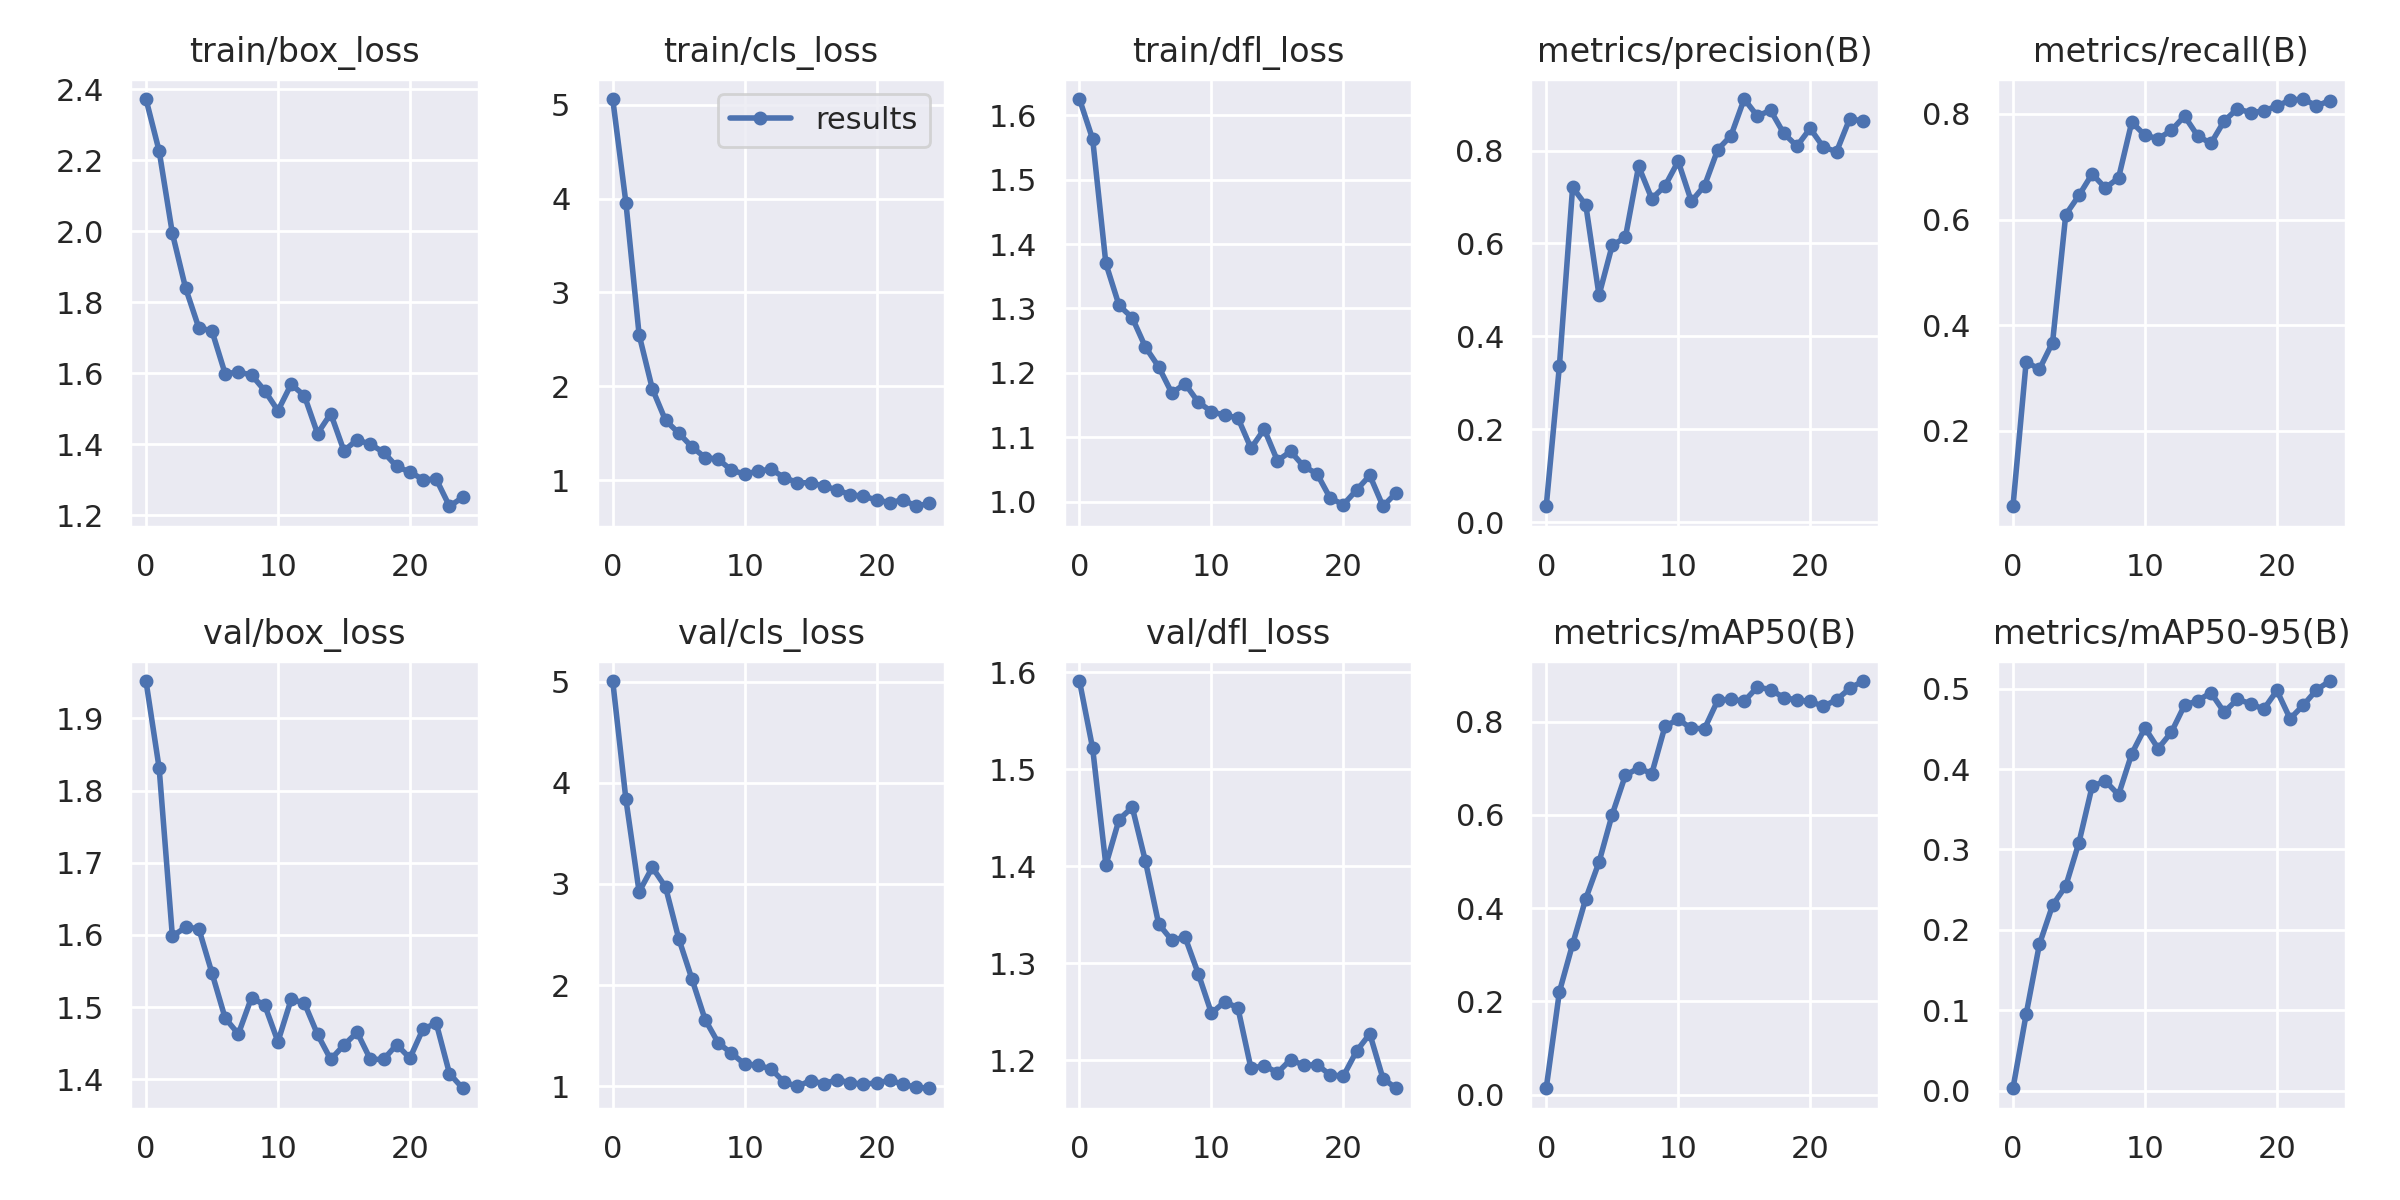

In [ ]:
Image(filename='runs/detect/train2/results.png', width=600)

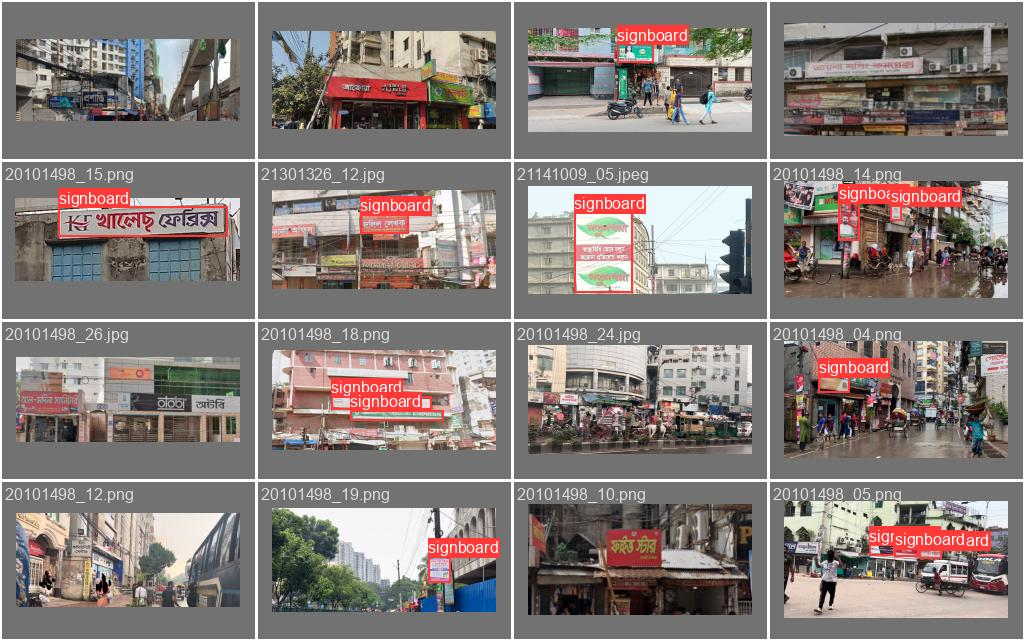

In [6]:
Image(filename='/content/drive/MyDrive/CSE428_Project/yolov8/runs/detect/train12/val_batch0_labels.jpg', width=600)

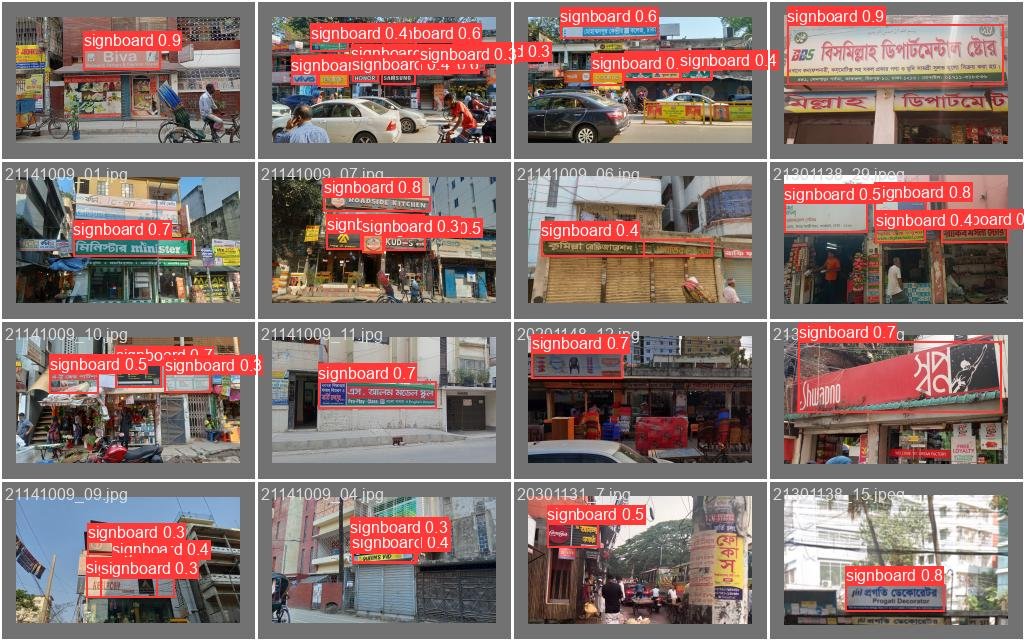

In [7]:
Image(filename='/content/drive/MyDrive/CSE428_Project/yolov8/runs/detect/train12/val_batch1_pred.jpg', width=600)

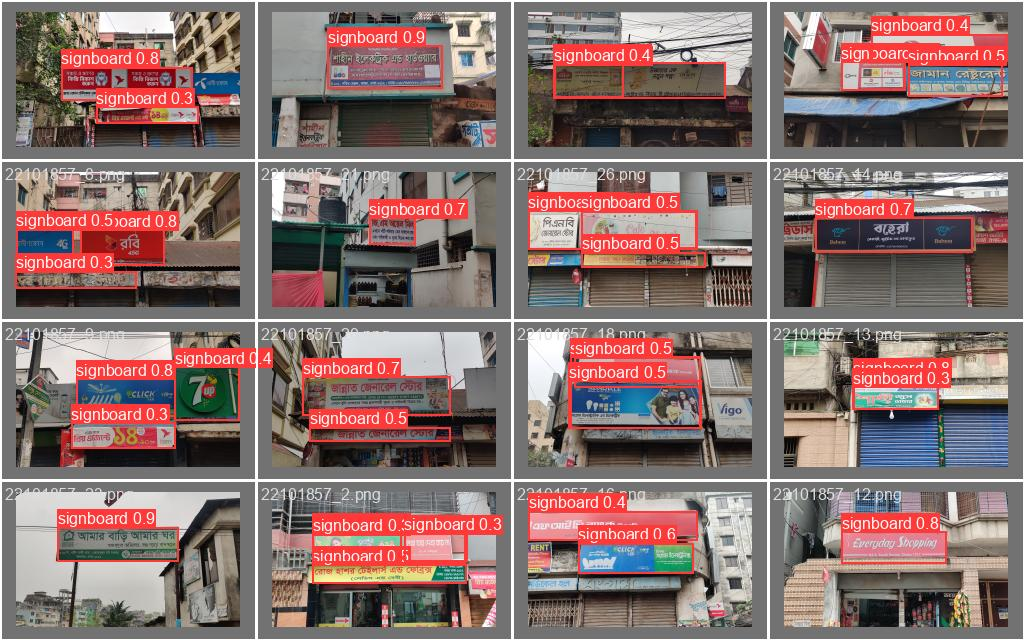

In [8]:
Image(filename='/content/drive/MyDrive/CSE428_Project/yolov8/runs/detect/train12/val_batch2_pred.jpg', width=600)

## Validate Custom Model

In [11]:
!yolo task=detect mode=val model=/content/drive/MyDrive/CSE428_Project/yolov8/runs/detect/train12/weights/best.pt data=data.yaml

2024-05-03 15:11:49.437456: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 15:11:49.437542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 15:11:49.635769: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 15:11:52.980387: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
100% 755k/755k [00:00<00:00, 16.2MB/s]
val: Scanning /content/drive/MyDrive/CSE428_Project/labels/t

## Inference with Custom Model

In [15]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/CSE428_Project/yolov8/runs/detect/train12/weights/best.pt conf=0.25 source=data/test/images1 save = true

2024-05-03 15:24:36.559121: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 15:24:36.559183: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 15:24:36.560816: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 15:24:37.917414: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/5 /content/drive/MyDrive/CSE428_Project/yolov8/data/test/images1/24141199_28.png: 160x224 1

**NOTE:** Let's take a look at few results.

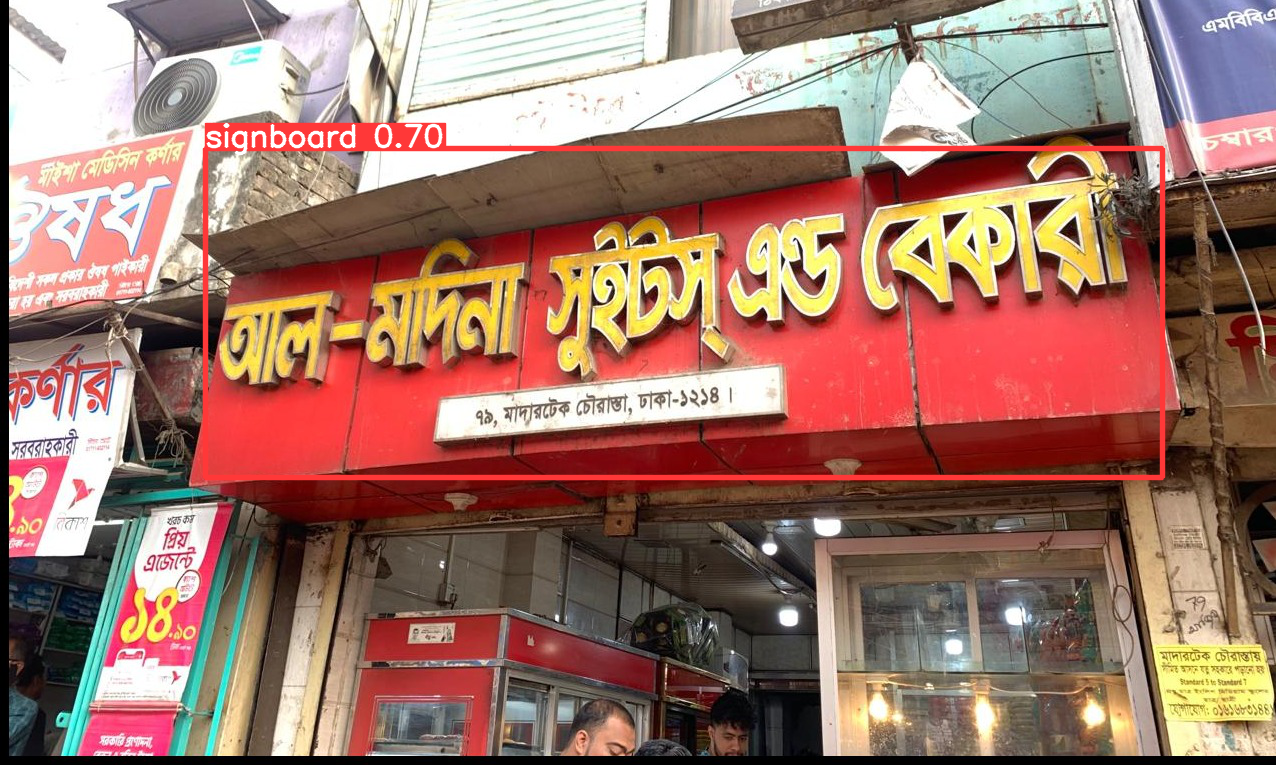

In [16]:
from ultralytics import YOLO

from IPython.display import display, Image
Image(filename = '/content/drive/MyDrive/CSE428_Project/yolov8/runs/detect/predict3/24141199_28.png' ,height = 600)

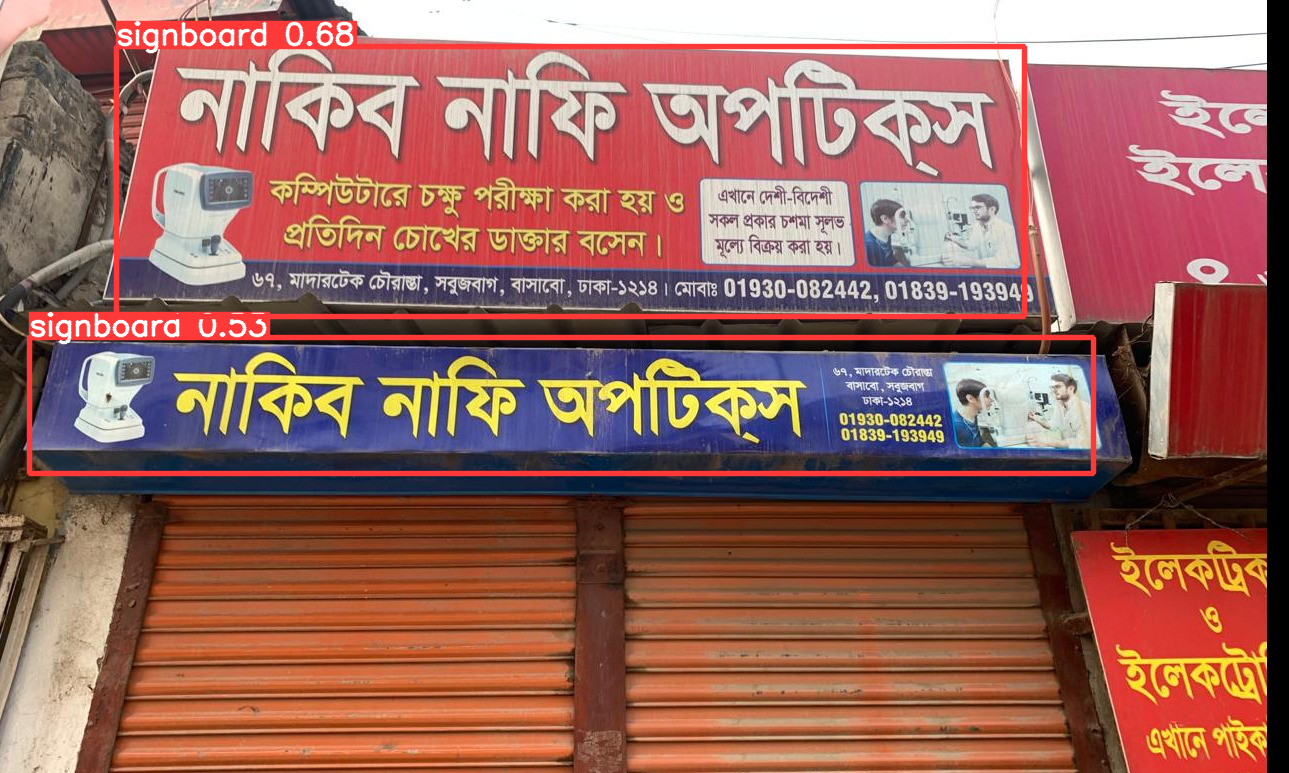

In [17]:
from ultralytics import YOLO

from IPython.display import display, Image
Image(filename = '/content/drive/MyDrive/CSE428_Project/yolov8/runs/detect/predict3/24141199_29.png' ,height = 600)

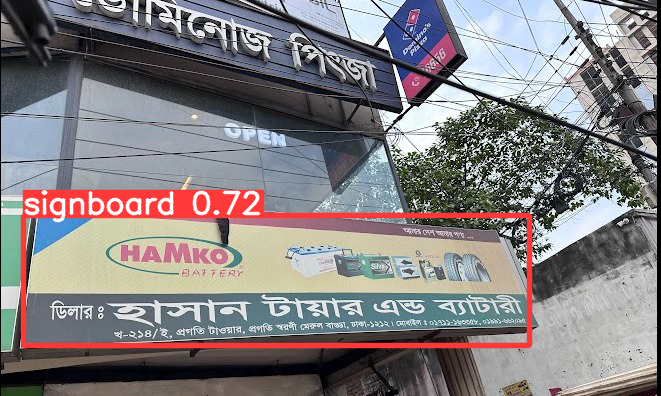

In [18]:
from ultralytics import YOLO

from IPython.display import display, Image
Image(filename = '/content/drive/MyDrive/CSE428_Project/yolov8/runs/detect/predict3/24141199_30.png' ,height = 600)

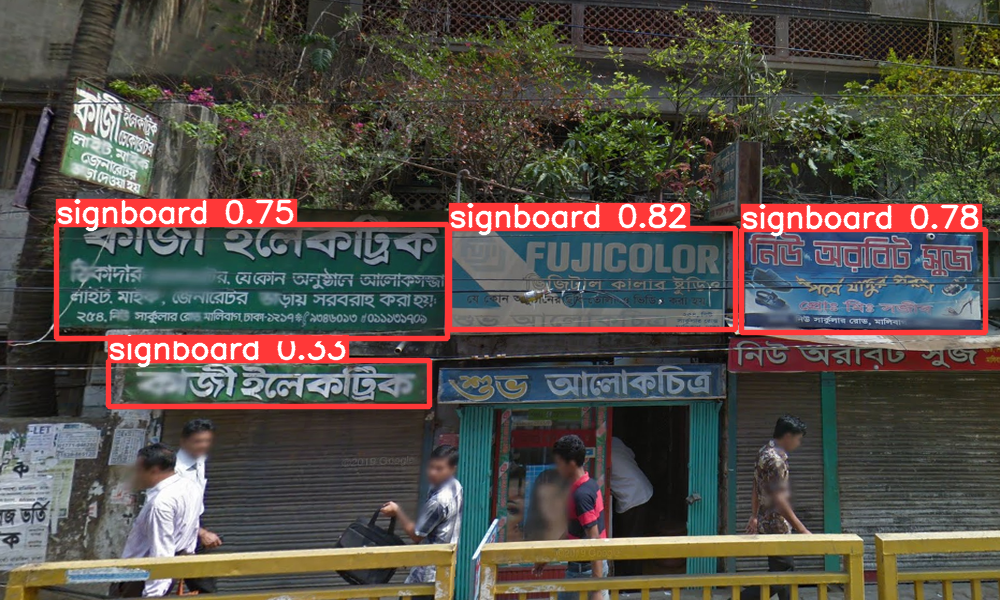

In [19]:
from ultralytics import YOLO

from IPython.display import display, Image
Image(filename = '/content/drive/MyDrive/CSE428_Project/yolov8/runs/detect/predict3/24141199_35.png' ,height = 600)